In [1]:
!pip install vaderSentiment openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving social_data.xlsx to social_data.xlsx


In [4]:
filename = list(uploaded.keys())[0]  # get the uploaded file name
df = pd.read_excel(filename)

In [5]:
df['clean_text'] = df['post_text'].str.lower().str.replace(r"http\S+|www.\S+", "", regex=True)

In [6]:
df['hashtags'] = df['clean_text'].apply(lambda x: re.findall(r"#\w+", x))

In [7]:
# Keyword Frequency (Stopword + Noise Removal)
stop_words = set(stopwords.words('english'))
custom_stopwords = stop_words.union({"—", "’s", "’re", "one", "us", "we’re","well","using","like","way",
                                     "video", "watch","use","also","find", "get", "know", "tools","help",
                                     "make", "new", "here:", "hashtag", "year","time","content","world",
                                     "next","alone","hard","crucial","sms","goo","gle","ahead","real",
                                     "started","top","senior","company","dac","three","keep","around",
                                     "going","want"})

# Tokenize, filter non-alphabetic, remove stopwords

brand_groups = df.groupby('source_page')
for brand, group in brand_groups:
    words = re.findall(r"\b[a-z]{3,}\b", ' '.join(group['clean_text']))
    filtered = [word for word in words if word not in custom_stopwords]
    top_keywords = Counter(filtered).most_common(20)
    print(f"\nTop Keywords for {brand}:")
    print(top_keywords)


Top Keywords for Meta for Business:
[('meta', 14), ('biz', 8), ('learn', 8), ('ads', 8), ('creative', 6), ('business', 6), ('instagram', 5), ('facebook', 5), ('social', 5), ('campaigns', 5), ('score', 5), ('people', 4), ('gen', 4), ('creating', 4), ('marketing', 4), ('creator', 4), ('generation', 3), ('features', 3), ('certification', 3), ('clients', 3)]

Top Keywords for Salesforce Marketing Cloud:
[('marketing', 13), ('cloud', 9), ('customers', 5), ('learn', 5), ('agentforce', 5), ('salesforce', 4), ('team', 4), ('personalized', 4), ('personalization', 4), ('brand', 3), ('product', 3), ('marketers', 3), ('agentic', 3), ('marketingchats', 3), ('seo', 3), ('data', 3), ('tips', 2), ('experience', 2), ('business', 2), ('register', 2)]

Top Keywords for Think with Google:
[('marketing', 9), ('cmo', 8), ('google', 7), ('youtube', 6), ('brand', 4), ('together', 4), ('creators', 4), ('growth', 4), ('ads', 4), ('marketers', 4), ('drive', 4), ('search', 4), ('gemini', 4), ('stronger', 3), ('c

In [8]:
# Hashtag Frequency by Brand
brand_groups = df.groupby('source_page')
for brand, group in brand_groups:
    group_tags = group['hashtags'].explode()
    tag_freq = Counter(group_tags.dropna()).most_common(10)
    print(f"\nTop Hashtags for {brand}:")
    print(tag_freq)


Top Hashtags for Meta for Business:
[('#aanhpiheritagemonth', 1)]

Top Hashtags for Salesforce Marketing Cloud:
[('#marketingchats', 3), ('#df25', 1), ('#salesforcerelease', 1)]

Top Hashtags for Think with Google:
[('#googlebeach', 3), ('#canneslions2025', 3), ('#possible2025', 2), ('#brandcast', 1), ('#googleaimadeitpossible', 1)]


In [9]:
# Sentiment Scoring
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)



In [10]:
# Brand-wise Average Sentiment Score
brand_sentiment = df.groupby('source_page')['sentiment_score'].mean().sort_values(ascending=False)
print("\n💬 Avg Sentiment Score by Brand:")
print(brand_sentiment)


💬 Avg Sentiment Score by Brand:
source_page
Meta for Business             0.896106
Think with Google             0.798587
Salesforce Marketing Cloud    0.539150
Name: sentiment_score, dtype: float64


In [11]:
#  Calculate Engagement Score (and show average by brand)
df['engagement'] = df['likes'] + df['comments'] + df['shares']
brand_engagement = df.groupby('source_page')['engagement'].mean().sort_values(ascending=False)
print("\nAvg Engagement by Brand:")
print(brand_engagement)



Avg Engagement by Brand:
source_page
Meta for Business             75.750
Salesforce Marketing Cloud    53.125
Think with Google             42.000
Name: engagement, dtype: float64


In [12]:
# Keyword Frequency in High-Engagement Posts by Brand
threshold = df['engagement'].quantile(0.75)
high_df = df[df['engagement'] >= threshold]
brand_groups = high_df.groupby('source_page')
for brand, group in brand_groups:
    text = ' '.join(group['clean_text'])
    words = re.findall(r"\b[a-z]{3,}\b", text)
    filtered = [word for word in words if word not in custom_stopwords]
    top_keywords = Counter(filtered).most_common(20)
    print(f"\n Top Keywords in High-Engagement Posts for {brand}:")
    print(top_keywords)


 Top Keywords in High-Engagement Posts for Meta for Business:
[('meta', 7), ('ads', 6), ('score', 5), ('campaigns', 4), ('learn', 4), ('marketing', 4), ('creator', 4), ('certification', 3), ('clients', 3), ('capi', 3), ('members', 3), ('list', 3), ('tool', 3), ('better', 3), ('reels', 3), ('instagram', 3), ('facebook', 3), ('gen', 3), ('asia', 2), ('rate', 2)]

 Top Keywords in High-Engagement Posts for Salesforce Marketing Cloud:
[('marketing', 5), ('cloud', 5), ('evp', 2), ('steve', 2), ('hammond', 2), ('data', 2), ('personalized', 2), ('product', 1), ('version', 1), ('ready', 1), ('alongside', 1), ('existing', 1), ('solutions', 1), ('facts', 1), ('right', 1), ('stream', 1), ('full', 1), ('keynote', 1), ('connections', 1), ('details', 1)]

 Top Keywords in High-Engagement Posts for Think with Google:
[('fast', 2), ('marketing', 2), ('agency', 2), ('church', 1), ('dwight', 1), ('surabhi', 1), ('pokhriyal', 1), ('mission', 1), ('escape', 1), ('pilot', 1), ('purgatory', 1), ('champion'

In [13]:
# Hashtag-level Engagement Analysis by Brand
brand_groups = df.groupby('source_page')
for brand, group in brand_groups:
    group['hashtag_str'] = group['hashtags'].apply(lambda x: ', '.join(x) if x else 'none')
    tag_engagement = group.groupby('hashtag_str')['engagement'].mean().sort_values(ascending=False).head(10)
    print(f"Avg Engagement by Hashtag Group for {brand}:")
    print(tag_engagement)


Avg Engagement by Hashtag Group for Meta for Business:
hashtag_str
none                    79.266667
#aanhpiheritagemonth    23.000000
Name: engagement, dtype: float64
Avg Engagement by Hashtag Group for Salesforce Marketing Cloud:
hashtag_str
#salesforcerelease                  87.000000
none                                58.083333
#df25                               31.000000
#marketingchats, #marketingchats    19.000000
#marketingchats                     16.000000
Name: engagement, dtype: float64
Avg Engagement by Hashtag Group for Think with Google:
hashtag_str
none                                      48.555556
#googlebeach, #canneslions2025            42.000000
#possible2025                             36.000000
#possible2025, #googleaimadeitpossible    20.000000
#brandcast                                11.000000
Name: engagement, dtype: float64


In [14]:
#  Content Tone Classification (Rule-Based)
def classify_tone(text):
    text = text.lower()
    if any(keyword in text for keyword in ['report', 'data', 'stats', 'trends', 'insights', 'explore']):
        return 'insightful'
    elif any(keyword in text for keyword in ['ceo', 'chief', 'vp', 'evp', 'executive', 'leadership', 'vision']):
        return 'thought leadership'
    elif any(keyword in text for keyword in ['launch', 'release', 'now available', 'new feature', 'update']):
        return 'product release'
    elif any(keyword in text for keyword in ['campaign', 'event', 'announcement', 'premiere', 'teaser']):
        return 'campaign/announcement'
    elif any(keyword in text for keyword in ['partner', 'collaborate', 'joint', 'together with']):
        return 'partnership/collaboration'
    elif any(keyword in text for keyword in ['how to', 'tips', 'get started', 'watch to learn', 'top tips', 'guide', 'step-by-step', 'how you', 'create content', 'performance', 'platform']):
        return 'how-to / tips'
    elif any(keyword in text for keyword in ['moral of the story', 'you can do it', 'started as', 'shared love', 'story of', 'founder', 'journey', 'grew up', 'turned into']):
        return 'motivational / biz story'
    elif any(keyword in text for keyword in ['ai', 'gen ai', 'powered by ai', 'agentic', 'sandbox', 'gemini', 'notebooklm', 'circle to search']):
        return 'ai use case / application'
    elif any(keyword in text for keyword in ['heritage', 'legacy', 'inclusive design', 'aanhpi', 'diversity', 'community', 'culture']):
        return 'culture / diversity / inclusion'
    elif any(keyword in text for keyword in ['holiday', 'festive', 'wishlist', 'seasonal', 'start planning', 'peak season']):
        return 'holiday / seasonal planning'
    elif any(keyword in text for keyword in ['customer story', 'success story', 'client saw', 'case study', 'brand spotlight', 'behind the scenes']):
        return 'customer success / testimonial'
    elif any(keyword in text for keyword in ['agentforce', 'salesforce personalization', 'personalization']):
        return 'product feature / walkthrough'
    elif any(keyword in text for keyword in ['question', 'share in comments', 'chat', 'conversation', 'discussion', 'community question']):
        return 'community engagement'
    else:
        return 'general'

df['content_tone'] = df['clean_text'].apply(classify_tone)

#  Inspect Posts Marked as 'General' by Brand
for brand, group in brand_groups:
    general_posts = group[group['content_tone'] == 'general'][['post_date', 'post_text']]
    print(f"Posts marked as 'general' for {brand}:")
    print(general_posts.to_string(index=False))

Posts marked as 'general' for Meta for Business:
Empty DataFrame
Columns: [post_date, post_text]
Index: []
Posts marked as 'general' for Salesforce Marketing Cloud:
Empty DataFrame
Columns: [post_date, post_text]
Index: []
Posts marked as 'general' for Think with Google:
Empty DataFrame
Columns: [post_date, post_text]
Index: []


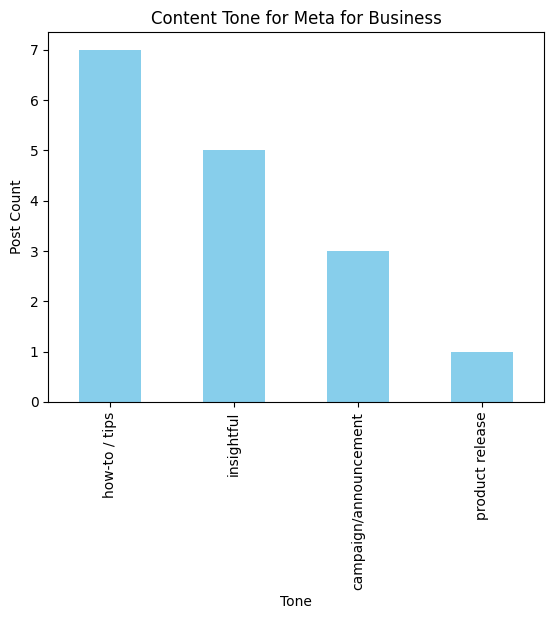

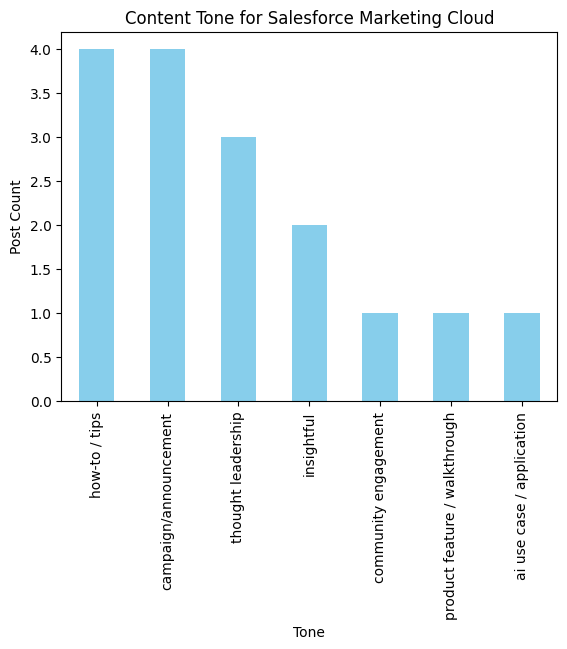

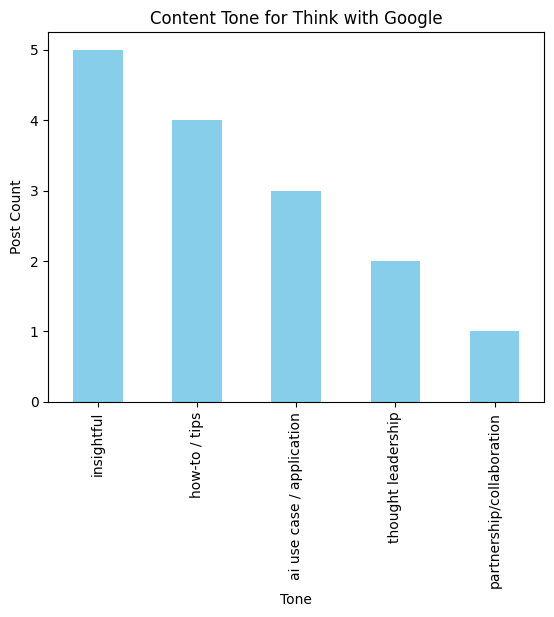

In [15]:
# Content Tone Distribution Plot by Brand
brand_groups = df.groupby('source_page')
for brand, group in brand_groups:
    group['content_tone'].value_counts().plot(kind='bar', title=f'Content Tone for {brand}', color='skyblue')
    plt.xlabel("Tone")
    plt.ylabel("Post Count")
    plt.show()

In [16]:
brand_groups = df.groupby('source_page')
for brand, group in brand_groups:
    print(f"\nContent Tone Distribution for {brand}:")
    print(group['content_tone'].value_counts())


Content Tone Distribution for Meta for Business:
content_tone
how-to / tips            7
insightful               5
campaign/announcement    3
product release          1
Name: count, dtype: int64

Content Tone Distribution for Salesforce Marketing Cloud:
content_tone
how-to / tips                    4
campaign/announcement            4
thought leadership               3
insightful                       2
community engagement             1
product feature / walkthrough    1
ai use case / application        1
Name: count, dtype: int64

Content Tone Distribution for Think with Google:
content_tone
insightful                   5
how-to / tips                4
ai use case / application    3
thought leadership           2
partnership/collaboration    1
Name: count, dtype: int64


In [17]:
# Export Data with Sentiment for your reference
df.to_csv("enriched_social_data.csv", index=False)
files.download("enriched_social_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>